# Chern analysis and prediction

This Colab is to create model for predicting behavior to retain customers of telecom company.

Reference data : https://www.kaggle.com/blastchar/telco-customer-churn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Data import and processing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Churn_telecom/Telco-Customer-Churn.csv')
df = df.drop(['TotalCharges'],axis=1)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


ดูรายละเอียดต่างๆใน Data set เช่น มี missing data ไหม data เป็นชนิดอะไรบ้าง เป็นต้น

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_mod1 = df.iloc[:, 1:21]
df_mod1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [ ]:
df.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [ ]:
df_mod1 = df_mod1.replace({'No':0, 'Yes':1})
df_mod1 = df_mod1.replace({'Male':0, 'Female':1})
df_mod1.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1
5,1,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,1
6,0,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,0
7,1,0,0,0,10,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,0
8,1,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,1
9,0,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,0


In [ ]:
df_mod1.MultipleLines.value_counts()

0                   3390
1                   2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
df_mod1 = df_mod1.replace(to_replace ="No phone service", value =2)

In [ ]:
df_mod1.InternetService.value_counts()

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

In [ ]:
df_mod1 = df_mod1.replace({'Fiber optic':1, 'DSL':2})
df_mod1.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,One year,0,Mailed check,56.95,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,1
5,1,0,0,0,8,1,1,1,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,1
6,0,0,0,1,22,1,1,1,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,0
7,1,0,0,0,10,0,2,2,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,0
8,1,0,1,0,28,1,1,1,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,1
9,0,0,0,1,62,1,0,2,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,0


In [ ]:
df_mod1.OnlineSecurity.value_counts()

0                      3498
1                      2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [ ]:
df_mod1 = df_mod1.replace(to_replace ="No internet service", value =2)

In [ ]:
df_mod1.OnlineBackup.value_counts()

0    3088
1    2429
2    1526
Name: OnlineBackup, dtype: int64

In [ ]:
df_mod1.DeviceProtection.value_counts()

0    3095
1    2422
2    1526
Name: DeviceProtection, dtype: int64

In [ ]:
df_mod1.TechSupport.value_counts()

0    3473
1    2044
2    1526
Name: TechSupport, dtype: int64

In [ ]:
df_mod1.StreamingTV.value_counts()

0    2810
1    2707
2    1526
Name: StreamingTV, dtype: int64

In [ ]:
df_mod1.StreamingMovies.value_counts()

0    2785
1    2732
2    1526
Name: StreamingMovies, dtype: int64

In [ ]:
df_mod1.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [ ]:
df_mod1 = df_mod1.replace({'Month-to-month':0, 'Two year':1, 'One year':2})
df_mod1.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,Electronic check,29.85,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,2,0,Mailed check,56.95,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,Mailed check,53.85,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,2,0,Bank transfer (automatic),42.30,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,Electronic check,70.70,1


In [ ]:
df_mod1.PaperlessBilling.value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [ ]:
df_mod1.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [ ]:
df_mod1 = df_mod1.replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
df_mod1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,2,0,1,56.95,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,2,0,2,42.30,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,1


In [ ]:
df_mod1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [ ]:
train_set, test_set = train_test_split(df_mod1, test_size=0.15, random_state=22)
print(len(train_set))
print(len(test_set))

5986
1057


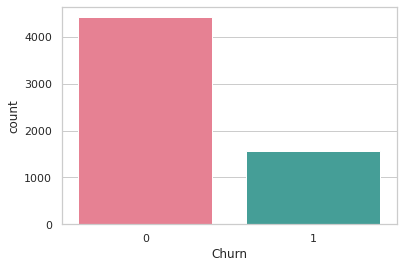

In [ ]:
# Train set
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Churn", data = train_set, palette='husl')

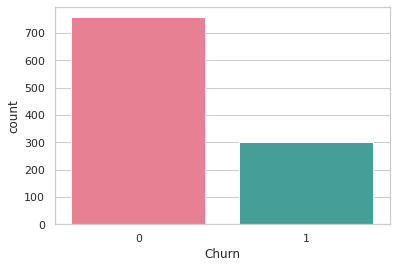

In [ ]:
# Test set
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Churn", data = test_set, palette='husl')

In [ ]:
x_train = train_set.iloc[:, 3:-1].values
y_train = train_set.iloc[:, -1].values

In [ ]:
x_test = test_set.iloc[:, 3:-1].values
y_test = test_set.iloc[:, -1].values

# Model

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
#Hidden layer 1
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
#Hidden layer 2
ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
#Output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
188/188 [==============================] - 1s 1ms/step - loss: 0.5618 - accuracy: 0.7379
Epoch 2/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.7785
Epoch 3/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.7863
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.7960
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.7970
Epoch 6/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.8020
Epoch 7/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8025
Epoch 8/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8037
Epoch 9/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4263 - accuracy: 0.8059
Epoch 10/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4255 - accura

# Test Model

In [ ]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[666  91]
 [154 146]]


0.7682119205298014

In [ ]:
def model_acc(predict,actual):
  con_martix = confusion_matrix(predict,actual)
  TN = con_martix[0][0]
  FN = con_martix[1][0]
  FP = con_martix[0][1]
  TP = con_martix[1][1]
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  return con_martix, Precision, Recall

In [ ]:
model_acc(y_test, y_pred)

(array([[666,  91],
        [154, 146]]), 0.6160337552742616, 0.4866666666666667)